# **ФУНДАМЕНТАЛНА АНАЛИЗА**

In [29]:
!pip install selenium

In [30]:
from google.colab import drive
drive.flush_and_unmount()

In [31]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [32]:
!rm /usr/bin/chromedriver

!wget https://storage.googleapis.com/chrome-for-testing-public/131.0.6778.204/linux64/chromedriver-linux64.zip

!ls -lh chromedriver-linux64.zip

!unzip -o chromedriver-linux64.zip -d /usr/bin/

!mv chromedriver /usr/bin/

rm: cannot remove '/usr/bin/chromedriver': No such file or directory
--2024-12-28 23:35:59--  https://storage.googleapis.com/chrome-for-testing-public/131.0.6778.204/linux64/chromedriver-linux64.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 142.251.179.207, 64.233.180.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9945236 (9.5M) [application/zip]
Saving to: ‘chromedriver-linux64.zip.1’

chromedriver-linux6 100%[===================>]   9.48M  --.-KB/s    in 0.1s    

2024-12-28 23:35:59 (82.2 MB/s) - ‘chromedriver-linux64.zip.1’ saved [9945236/9945236]

-rw-r--r-- 1 root root 9.5M Dec 17 19:26 chromedriver-linux64.zip
Archive:  chromedriver-linux64.zip
  inflating: /usr/bin/chromedriver-linux64/LICENSE.chromedriver  
  inflating: /usr/bin/chromedriver-linux64/THIRD_PARTY_NOTICES.chromedriver  
  inflating: /usr/bin/chromedriver-linux64/chrom

In [33]:
import pandas as pd

df = pd.read_csv(r"/content/drive/MyDrive/historical_data.csv")

# Форматирање на колоната Date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

In [34]:
unique_company_codes = df['CompanyCode'].unique().tolist()
print(unique_company_codes)

['TNB', 'MPT', 'SBT', 'KMB', 'REPL', 'UNI', 'APTK', 'ALK', 'GRNT', 'SPAZ', 'TEL', 'VITA', 'OKTA', 'MTUR', 'STIL', 'STB', 'TETE', 'MPOL', 'FERS', 'TKVS', 'MKSD', 'LOZP', 'RZLE', 'SIL', 'RZLV', 'PPIV', 'STBP', 'VTKS', 'RZUS', 'RZTK', 'FUBT', 'KVAS', 'USJE', 'SOLN', 'TTK', 'CEVI', 'ADIN', 'ZPKO', 'LOTO', 'ATPP', 'MAKP', 'FAKM', 'ELMA', 'SPAZP', 'RZEK', 'VROS', 'RZIT', 'PKB', 'RADE', 'KOMU', 'BGOR', 'AUMK', 'GRZD', 'SLAV', 'GIMS', 'TRPS', 'ZILU', 'ZKAR', 'TAJM', 'MERM', 'ZIMS', 'INB', 'OILK', 'POPK', 'PGGV', 'ZAS', 'TSMP', 'DIMI', 'TKPR', 'SDOM', 'KPSS', 'KJUBI', 'OPTK', 'RINS', 'GTRG', 'DEBA', 'RZUG', 'NEME', 'ZUAS', 'KMPR', 'PROD', 'RZIZ', 'TEHN', 'KARO', 'KORZ', 'ZPOG', 'AMEH', 'KONZ', 'BANA', 'EUMK', 'GRSN', 'INPR', 'MZPU', 'MB', 'NOSK', 'CDHV', 'EUHA', 'TIKV', 'PELK', 'ALKB', 'EVRO', 'TRUB', 'STOK', 'BIM', 'ENER', 'TEAL', 'JULI', 'CKB', 'KDFO', 'GALE', 'INEK', 'INDI', 'TBKO', 'RIMI', 'BIKF', 'GECK', 'SKON', 'GDKM', 'VSC', 'GRDN', 'SSPR', 'GECT', 'MAGP', 'PTRS', 'SNBT', 'MAKS', 'FROT',

In [67]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
from bs4 import BeautifulSoup

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

In [69]:
news_data = []

# за секоја компанија посебно ги земаме вестите
for code in unique_company_codes:
    url = f"https://www.mse.mk/mk/search/{code}"
    driver.get(url)
    time.sleep(3)

    news_button_xpath = "//div[@class='btn btn-link' and contains(., 'Вести')]"

    if driver.find_elements(By.XPATH, news_button_xpath):
        vesti_button = driver.find_element(By.XPATH, news_button_xpath)
        driver.execute_script("arguments[0].scrollIntoView(true);", vesti_button)
        WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, news_button_xpath))
        ).click()

        # ги пронаоѓаме сите датуми и текстови (вести) за дадената компанија, ги изминуваме ред по ред
        # и потоа ги сместуваме во одреден DatаFrame
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, "collapseOne"))
        )

        news_path = "//div[@id='collapseOne']//div[@class='card-body']"
        news = driver.find_element(By.XPATH, news_path)
        html_content = news.get_attribute("outerHTML")

        soup = BeautifulSoup(html_content, "html.parser")
        rows = soup.find_all("div", class_="row")

        for row in rows:
            date_column = row.find("a")
            date = date_column.text.strip()

            text_column = row.find_all("a")[1]
            text = text_column.text.strip()

            news_data.append({"CompanyCode": code, "Date": date, "Text": text})
    else:
        # доколку не се пронајде копчето 'Вести', тоа значи дека за таа компанија нема објавено вести.
        print(f"Не постојат вести за компанијата: {code}")
        continue

df_combined = pd.DataFrame(news_data)

driver.quit()

Не постојат вести за компанијата: APTK
Не постојат вести за компанијата: STIL
Не постојат вести за компанијата: RZLV
Не постојат вести за компанијата: PPIV
Не постојат вести за компанијата: STBP
Не постојат вести за компанијата: RZUS
Не постојат вести за компанијата: KVAS
Не постојат вести за компанијата: SOLN
Не постојат вести за компанијата: ELMA
Не постојат вести за компанијата: SPAZP
Не постојат вести за компанијата: RZEK
Не постојат вести за компанијата: RZIT
Не постојат вести за компанијата: GRZD
Не постојат вести за компанијата: TRPS
Не постојат вести за компанијата: TAJM
Не постојат вести за компанијата: POPK
Не постојат вести за компанијата: PGGV
Не постојат вести за компанијата: TKPR
Не постојат вести за компанијата: SDOM
Не постојат вести за компанијата: KJUBI
Не постојат вести за компанијата: OPTK
Не постојат вести за компанијата: GTRG
Не постојат вести за компанијата: NEME
Не постојат вести за компанијата: KMPR
Не постојат вести за компанијата: RZIZ
Не постојат вести за ко

In [70]:
df_combined

,CompanyCode,Date,Text
0,TNB,13.9.2023,Успешен Инвеститорски ден на Македонска берза
1,TNB,27.5.2019,Блок трансакција
2,TNB,14.11.2017,БЛОК ТРАНСАКЦИИ
3,TNB,07.6.2011,Блок трансакција
4,MPT,17.5.2024,Блок трансакции
...,...,...,...
540,PROT,16.5.2011,Пристап преку FIX PROTOCOL за овластените дист...
541,PROT,10.3.2010,Нови Правила за тргување и нова софтверска вер...
542,AMBR,28.1.2011,Привремен прекин на тргувањето на ден 28.01.20...
543,AMBR,01.2.2010,Конкурс за годишна награда за истражувачки труд


In [71]:
# За да може моделот да ги препознае и подобро да ги предвиди категориите на вести, потребно е да ги претвориме сите редови
# во колоната Label од големи во мали букви.
df_combined["Text"] = df_combined["Text"].str.lower()
df_combined

,CompanyCode,Date,Text
0,TNB,13.9.2023,успешен инвеститорски ден на македонска берза
1,TNB,27.5.2019,блок трансакција
2,TNB,14.11.2017,блок трансакции
3,TNB,07.6.2011,блок трансакција
4,MPT,17.5.2024,блок трансакции
...,...,...,...
540,PROT,16.5.2011,пристап преку fix protocol за овластените дист...
541,PROT,10.3.2010,нови правила за тргување и нова софтверска вер...
542,AMBR,28.1.2011,привремен прекин на тргувањето на ден 28.01.20...
543,AMBR,01.2.2010,конкурс за годишна награда за истражувачки труд


In [72]:
from transformers import pipeline

model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Моделот nlptown/bert-base-multilingual-uncased-sentiment работи на начин што за секое предвидување како резултат
# враќа број на sвезди од 1-5, па затоа мора да го преработиме тој резултат за да може да се класифицира во една од
# трите категории: buy, sell или hold
def pos_neg_sentiment(label):
    if label in ["1 star", "2 stars"]:
        return "Negative"
    elif label == "3 stars":
        return "Neutral"
    else:
        return "Positive"

def process_text(x):
    return pos_neg_sentiment(model(x)[0]['label'])

df_combined['Label'] = df_combined['Text'].apply(process_text)

Device set to use cpu


In [73]:
df_combined[['CompanyCode', 'Date', 'Text', 'Label']]

,CompanyCode,Date,Text,Label
0,TNB,13.9.2023,успешен инвеститорски ден на македонска берза,Positive
1,TNB,27.5.2019,блок трансакција,Positive
2,TNB,14.11.2017,блок трансакции,Positive
3,TNB,07.6.2011,блок трансакција,Positive
4,MPT,17.5.2024,блок трансакции,Positive
...,...,...,...,...
540,PROT,16.5.2011,пристап преку fix protocol за овластените дист...,Positive
541,PROT,10.3.2010,нови правила за тргување и нова софтверска вер...,Positive
542,AMBR,28.1.2011,привремен прекин на тргувањето на ден 28.01.20...,Negative
543,AMBR,01.2.2010,конкурс за годишна награда за истражувачки труд,Positive


In [74]:
recommendations = []

for company in df_combined['CompanyCode'].unique():

 # Од целата табела (DataFrame) го земаме подмножеството за секоја компанија и го обработуваме посебно
    company_data = df_combined[df_combined['CompanyCode'] == company]

 # За секое подмножество го наоѓаме бројот на позитивни и негативни вести
    positive = company_data[company_data['Label'] == 'Positive'].shape[0]
    negative = company_data[company_data['Label'] == 'Negative'].shape[0]

 # Со помош на условите проверуваме колку се разликува бројот на позитивни и негативни вести и според тоа ги ставаме
 # во една од категориите (buy, sell или hold)
    if positive > negative:
        recommendation = 'Buy'
    elif negative > positive:
        recommendation = 'Sell'
    else:
        recommendation = 'Hold'

    recommendations.append({
        'CompanyCode': company,
        'Positive': positive,
        'Negative': negative,
        'Recommendation': recommendation
     })

In [75]:
recommendation_df = pd.DataFrame(recommendations)
recommendation_df

,CompanyCode,Positive,Negative,Recommendation
0,TNB,4,0,Buy
1,MPT,8,0,Buy
2,SBT,16,0,Buy
3,KMB,18,0,Buy
4,REPL,14,0,Buy
...,...,...,...,...
94,SNBTO,1,1,Hold
95,KLST,1,0,Buy
96,JAKO,1,0,Buy
97,PROT,2,0,Buy


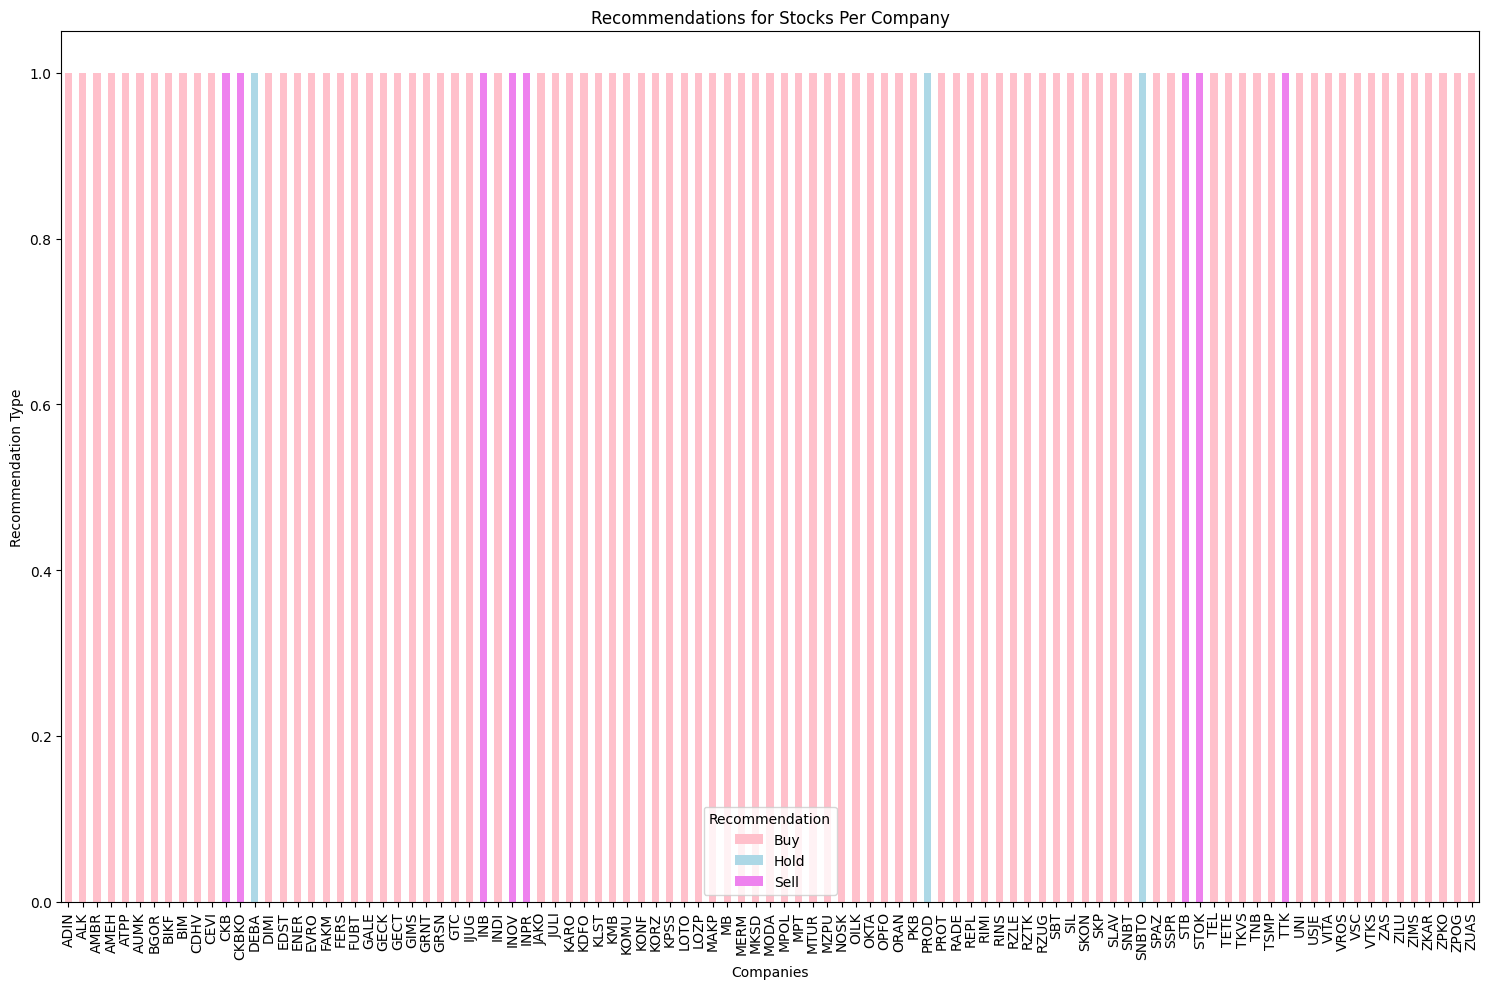

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Пример за визуелизација
recommendation_counts = recommendation_df.groupby(['CompanyCode', 'Recommendation']).size().unstack(fill_value=0)

recommendation_counts.plot(kind='bar', stacked=True, color=['pink', 'lightblue', 'violet'], figsize=(15, 10))

plt.title('Recommendations for Stocks Per Company')
plt.ylabel('Recommendation Type')
plt.xlabel('Companies')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()